### Energy Consumption Forecasting with XGBoost

In [48]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [16]:
# importing the dataset

df = pd.read_csv('AEP_hourly.csv')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [17]:
df.tail()

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


In [18]:
df.shape

(121273, 2)

In [19]:
df.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [20]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [21]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [23]:
df.index

DatetimeIndex(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
               '2004-12-31 03:00:00', '2004-12-31 04:00:00',
               '2004-12-31 05:00:00', '2004-12-31 06:00:00',
               '2004-12-31 07:00:00', '2004-12-31 08:00:00',
               '2004-12-31 09:00:00', '2004-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=121273, freq=None)

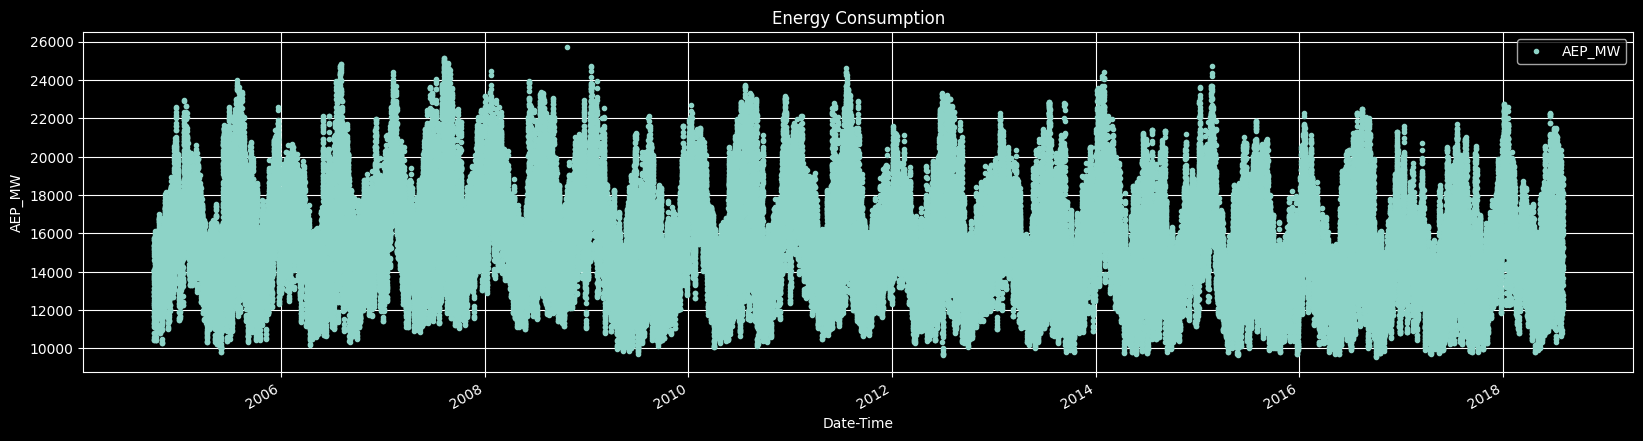

In [22]:
df.plot(style = '.', figsize=(20,5))
plt.xlabel('Date-Time')
plt.ylabel('AEP_MW')
plt.title('Energy Consumption')
plt.grid()
plt.show()

In [24]:
# train test split

train_size = int(len(df)*0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

print(f'df_train shape: ', df_train.shape)
print(f'df_test shape: ', df_test.shape)

df_train shape:  (97018, 1)
df_test shape:  (24255, 1)


In [27]:
df_train.tail()

,AEP_MW
Datetime,
2015-03-07 04:00:00,17331.0
2015-03-07 05:00:00,17484.0
2015-03-07 06:00:00,17855.0
2015-03-07 07:00:00,18292.0
2015-03-07 08:00:00,18497.0


In [28]:
df_test.head()

,AEP_MW
Datetime,
2015-03-07 09:00:00,18343.0
2015-03-07 10:00:00,17768.0
2015-03-07 11:00:00,17163.0
2015-03-07 12:00:00,16433.0
2015-03-07 13:00:00,15798.0


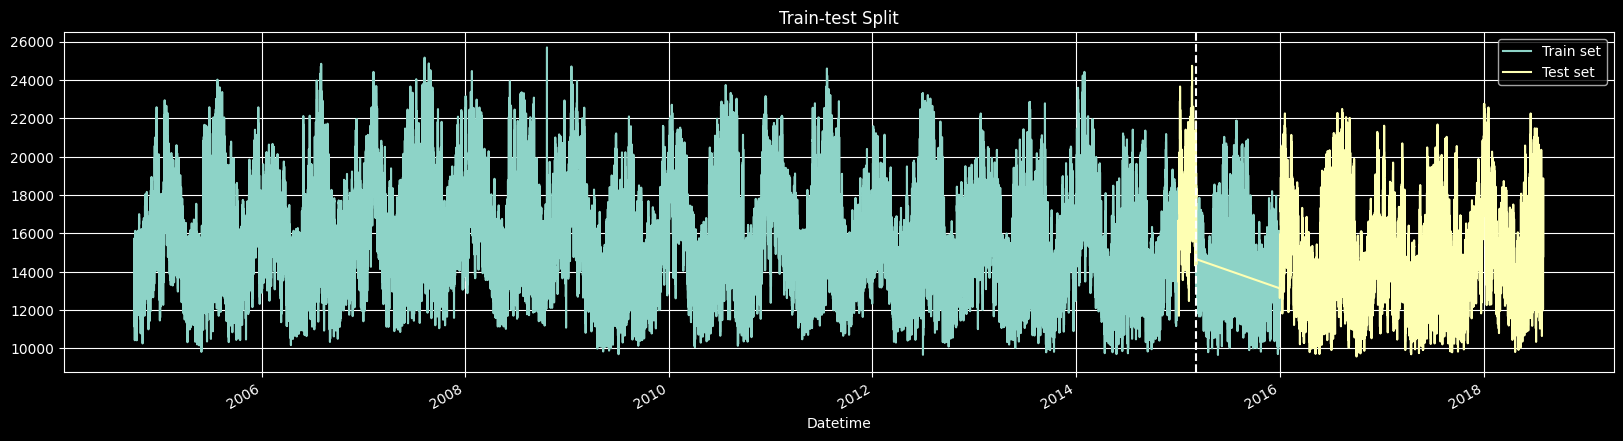

In [33]:
fig,ax = plt.subplots(figsize = (20,5))
df_train.plot(ax=ax, label = 'Train')
df_test.plot(ax=ax,label='Test')
ax.axvline('2015-03-07 09:00:00',color='white',ls = '--')
plt.title('Train-test Split')
ax.legend(['Train set','Test set'])
plt.grid()
plt.show()

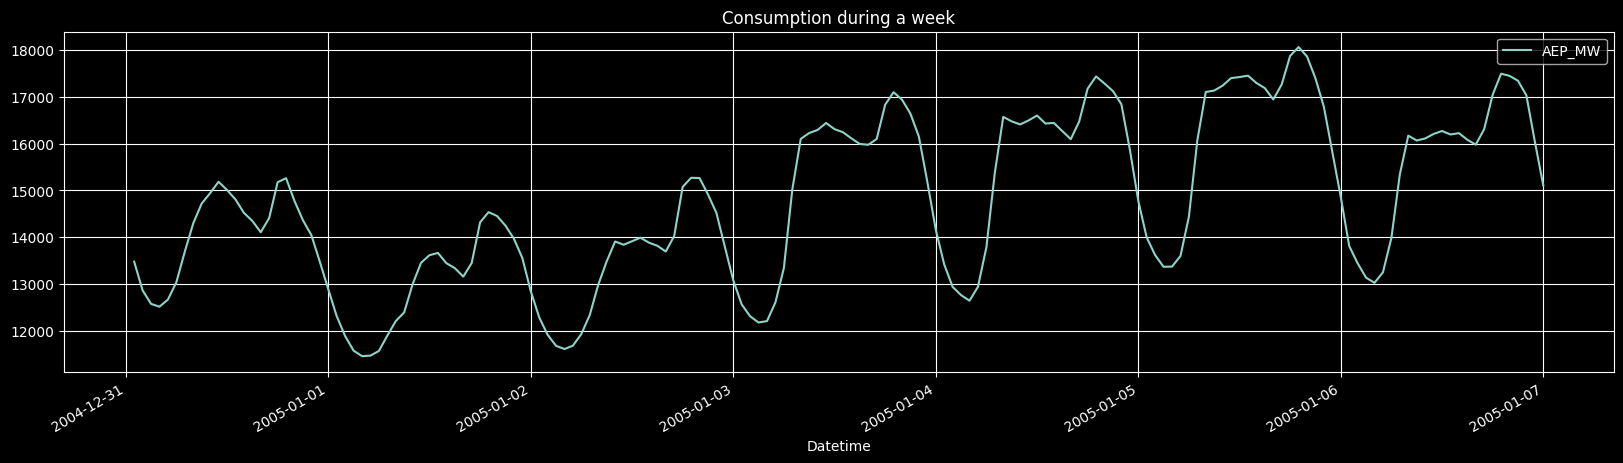

In [37]:
# plotting data of a week

df.iloc[(df.index > '2004-12-31') & (df.index <= '2005-01-07')].plot(figsize=(20,5), title = 'Consumption during a week')
plt.grid()
plt.show()

In [41]:
# Feature Engineering

def create_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear

    return df


In [42]:
df = create_features(df)
df.head()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366


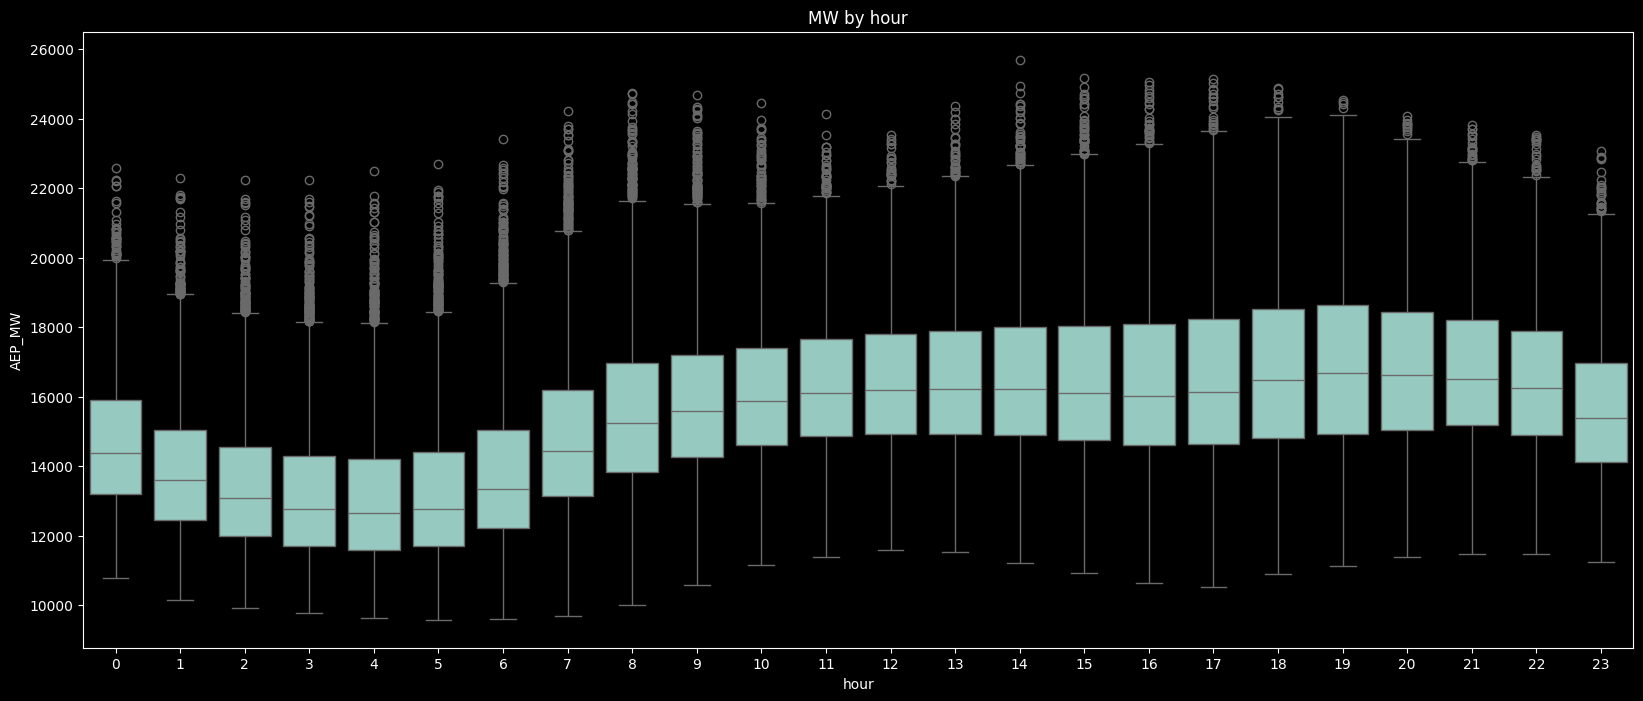

In [44]:
# Visualize Feature/Target relationship

fig,ax = plt.subplots(figsize = (20,8))
sns.boxplot(data = df , x = 'hour', y = 'AEP_MW')
ax.set_title('MW by hour')
plt.show()

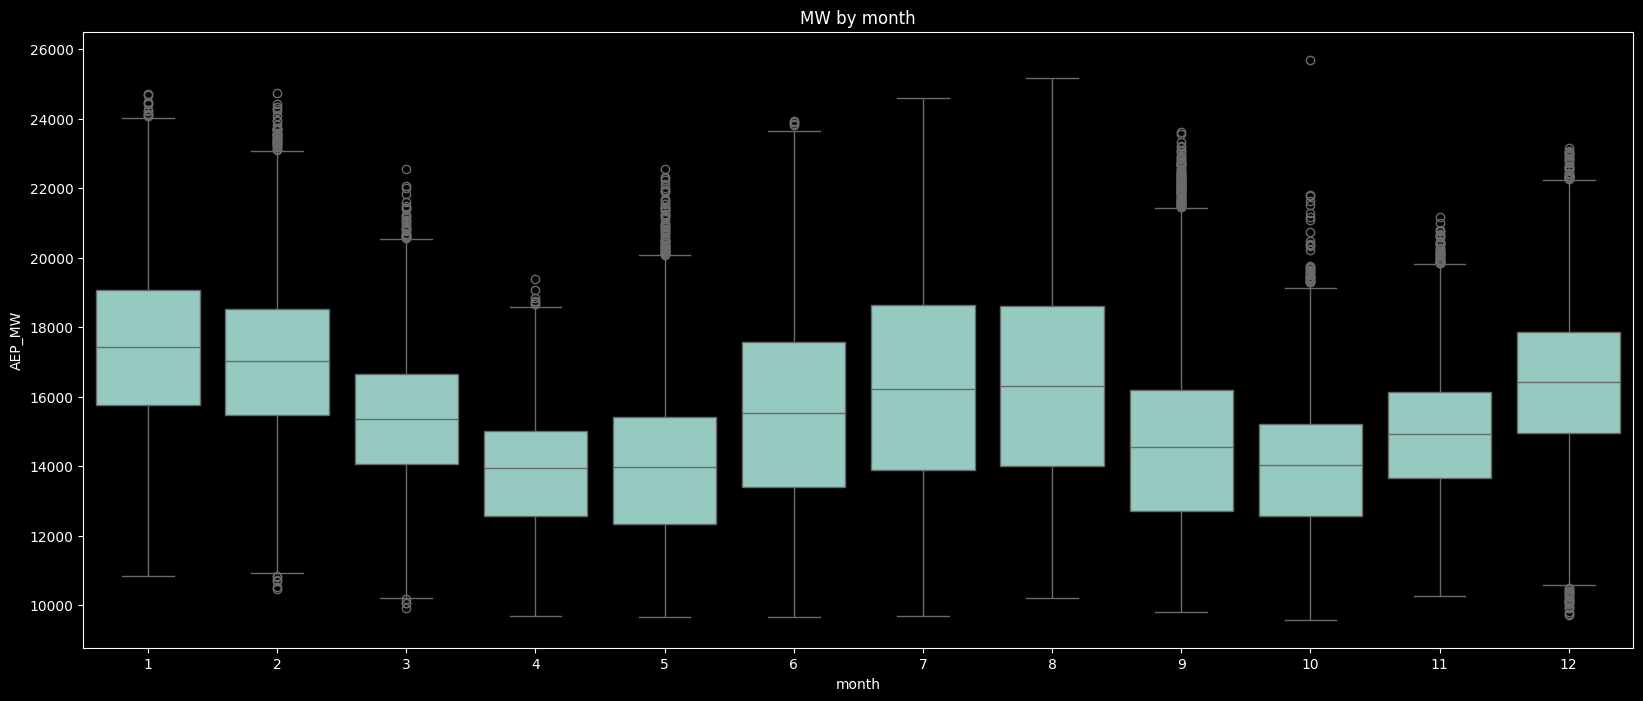

In [45]:
fig,ax = plt.subplots(figsize = (20,8))
sns.boxplot(data = df , x = 'month', y = 'AEP_MW')
ax.set_title('MW by month')
plt.show()

In [ ]:
# model building
